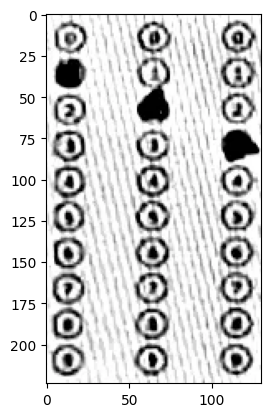

In [83]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imutils

image = cv2.imread("static_2024_transformed_6208022004_1~bubbleSheet1.webp")
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()
    
cv2_imshow(image)

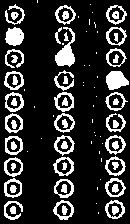

In [84]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
display(Image.fromarray(thresh))

Found 71 contours
Found 29 questionCnts


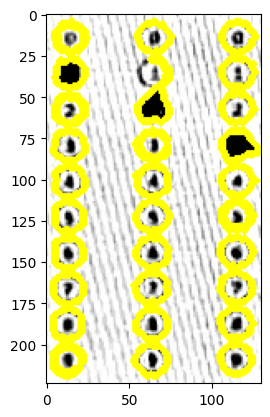

In [85]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
bubbleCnts = []
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour, then use the
    # bounding box to derive the aspect ratio
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    # in order to label the contour as a question, region
    # should be sufficiently wide, sufficiently tall, and
    # have an aspect ratio approximately equal to 1
    # if ar >= 1.0 and ar <= 1.5:
    #     questionCnts.append(c)
    if w >= 10 and h >= 10:
        bubbleCnts.append(c)
    # if w >= 20 and h >= 20 and ar >= 0.9 and ar <= 1.1:
    #     questionCnts.append(c)
print("Found {} contours".format(len(cnts)))
print("Found {} bubbleCnts".format(len(bubbleCnts)))

with_contours = cv2.drawContours(image.copy(), bubbleCnts, -1, (0, 255, 255), 3)
cv2_imshow(with_contours)

10
9
10


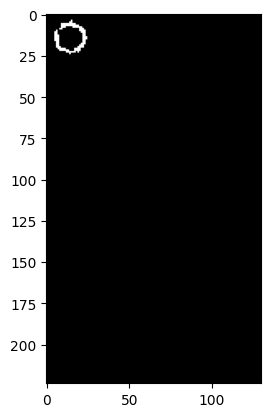

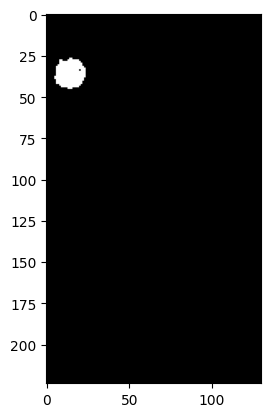

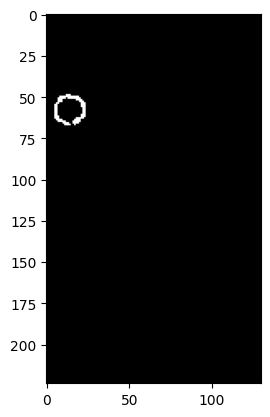

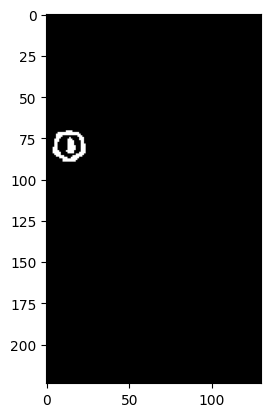

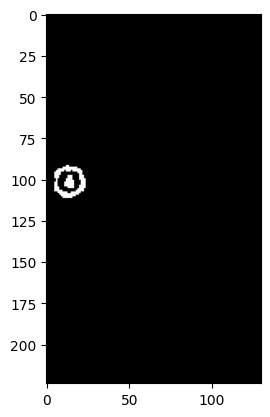

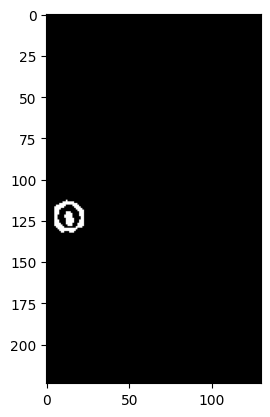

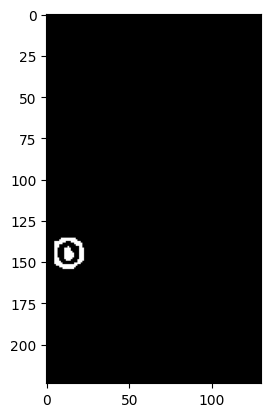

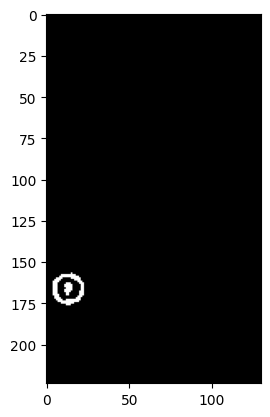

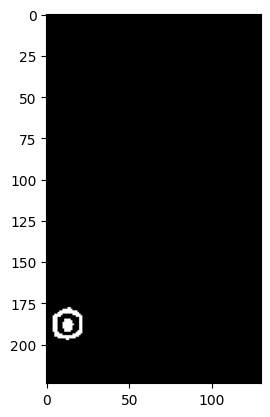

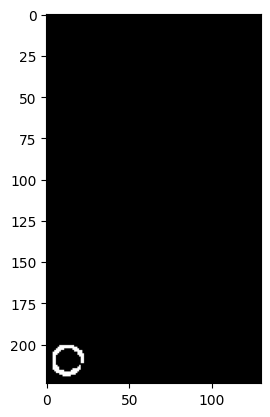

1


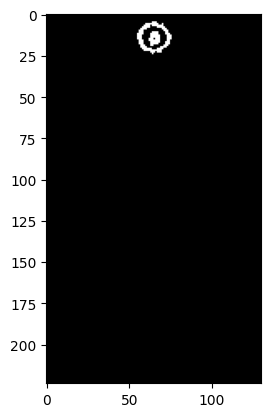

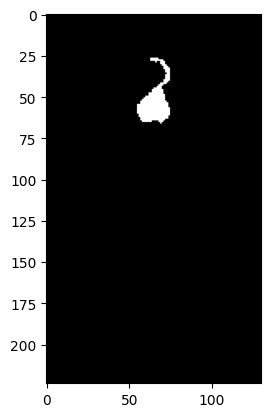

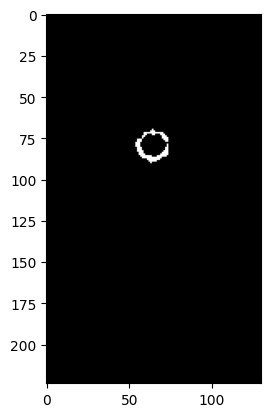

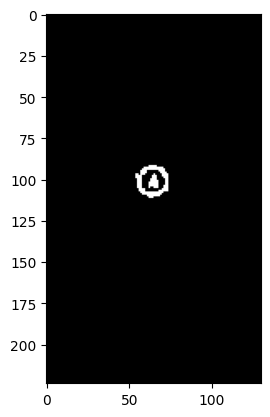

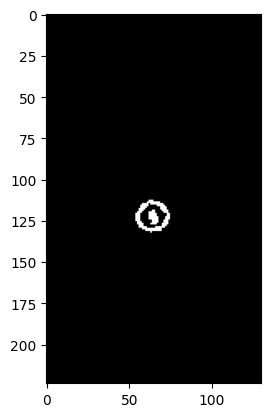

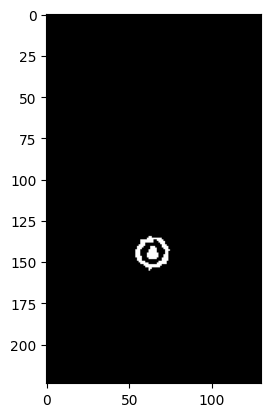

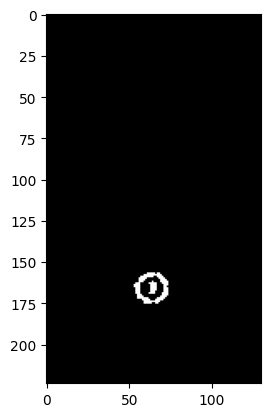

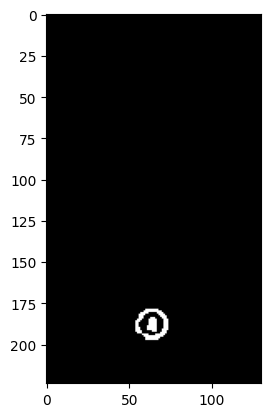

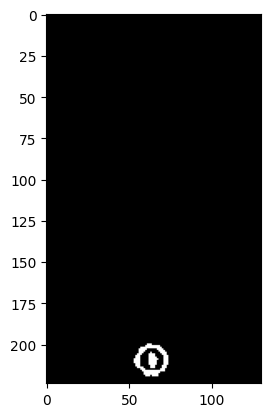

1


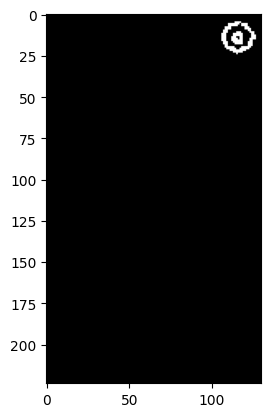

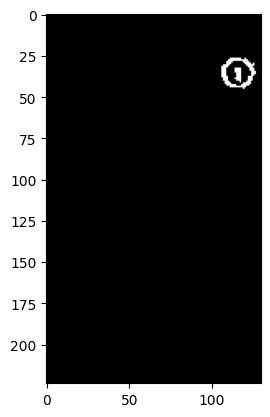

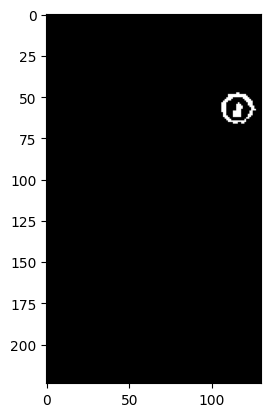

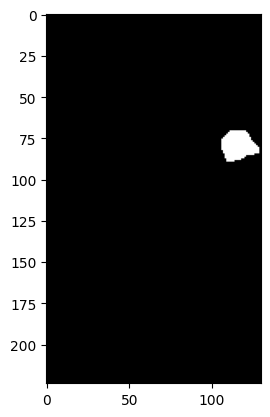

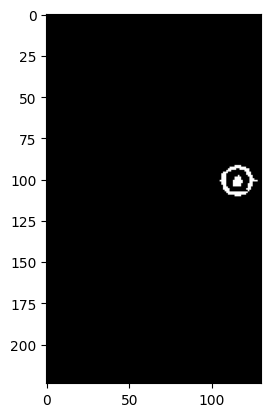

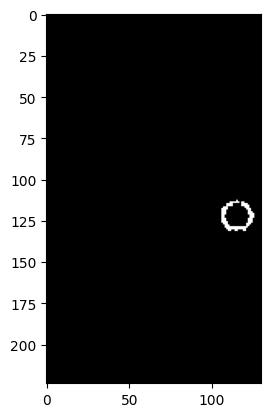

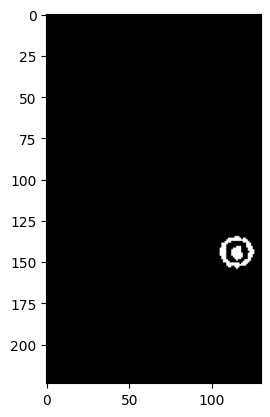

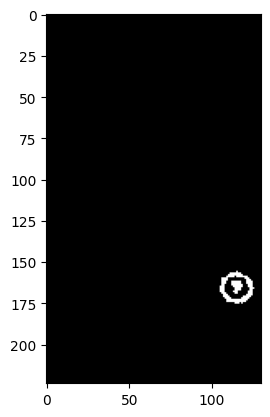

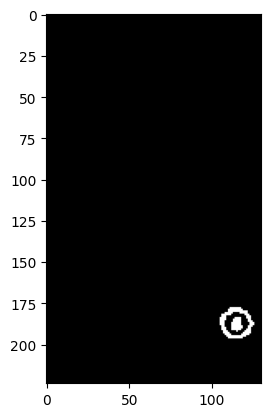

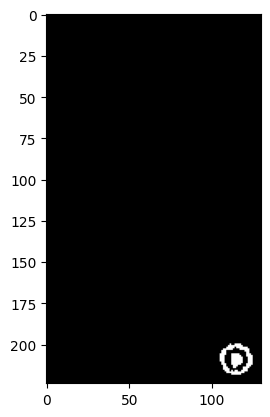

3


In [88]:
def group_to_number(group):
    sorted_by_y = sorted(group, key=lambda ctr: cv2.boundingRect(ctr)[1])
    most_filled = (0,0)
    second_most_filled = (0,0)
    for idx, cont in enumerate(sorted_by_y):
        mask = np.zeros(thresh.shape, dtype="uint8")
        cv2.drawContours(mask, [cont], -1, 255, -1)
        mask = cv2.bitwise_and(thresh, thresh, mask=mask)
        total = cv2.countNonZero(mask)
    
        if total > most_filled[1]:
            most_filled = (idx, total)
        elif total > second_most_filled[1]:
            second_most_filled = (idx, total)
        cv2_imshow(mask)
        # print(f"{idx}: {total} {cv2.contourArea(cont)}")
    ratio = most_filled[1] / second_most_filled[1]
    if ratio > 1.2:
        return most_filled[0]
    return 0

def extract_three_numbers(cnt):
    sorted_by_x = sorted(cnt, key=lambda ctr: cv2.boundingRect(ctr)[0])
    (previous_x, _, _, _) = cv2.boundingRect(sorted_by_x[0])

    contours = []
    contour_group = []
    for contour in sorted_by_x:
        (x, y, w, h) = cv2.boundingRect(contour)
        distance = x - previous_x
        if distance > 20:
            contours.append(contour_group)
            contour_group = []
    
        contour_group.append(contour)
        previous_x = x
    contours.append(contour_group)
    return contours
three = extract_three_numbers(bubbleCnts)

print(len(three[0]))
print(len(three[1]))
print(len(three[2]))

print(group_to_number(three[0]))
print(group_to_number(three[1]))
print(group_to_number(three[2]))
